In [66]:
# Data Handling & Manipulation
import pandas as pd                                         # for dataframes, CSV/Excel reading, tabular data manipulation
import numpy as np                                          # for numerical operations and array handling
import datetime                                             # for date and time manipulation
from datetime import datetime, timedelta                    # for date arithmetic (e.g., adding days)
from workalendar.america import Brazil                      # for Brazilian holidays (e.g., to check if a date is a holiday)

# Data Visualisation (Static)
import matplotlib.pyplot as plt                             # for creating static plots
from matplotlib.ticker import FuncFormatter                 # for customising tick labels (e.g., currency, %)
import seaborn as sns                                       # for statistical visualisation (heatmaps, distplots, etc.)

# Data Visualisation (Interactive)
import plotly.express as px                                 # for quick and interactive visualisation
import plotly.graph_objects as go                           # for custom interactive plots
from plotly.subplots import make_subplots                   # for interactive subplots

# Data Quality & Missing Value Visualisation
import missingno as msno                                    # for visualising missing data patterns

# Statistical Testing & Inference
from statsmodels.stats.proportion import proportions_ztest  # for comparing proportions (e.g., late vs. on-time)
from scipy.stats import (
    normaltest,                                             # for checking normality
    chi2_contingency,                                       # for categorical association
    mannwhitneyu,                                           # for non-parametric testing
    ttest_ind,                                              # for independent sample t-test
    f_oneway,                                               # for one-way ANOVA
    kruskal,                                                # for Kruskal-Wallis test
    kstest,                                                 # for Kolmogorov-Smirnov test
    spearmanr,                                              # for Spearman correlation
    pointbiserialr                                          # for point-biserial correlation (binary vs. continuous)
)
import statsmodels.api as sm                                # for advanced statistical modelling and diagnostics
import statsmodels.formula.api as smf                       # for formula-based statistical models
from statsmodels.stats.multicomp import pairwise_tukeyhsd   # for post-hoc tests after ANOVA

# System & Settings
import os                                                   # for file handling and directory operations
import warnings                                             # to suppress or manage warning messages
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_colwidth', None)                 # display full content in cells (useful for text data)

# Machine Learning & Model Evaluation
import joblib                                               # for saving and loading ML models
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    average_precision_score, precision_recall_fscore_support,
    confusion_matrix, PrecisionRecallDisplay, make_scorer
)
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier           # for KNN classifier (added since it's in your benchmark)
from sklearn.tree import DecisionTreeClassifier              # for Decision Tree classifier (added since it's in your benchmark)
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from xgboost import XGBClassifier                           # for XGBoost classifier
from lightgbm import LGBMClassifier                         # for LightGBM classifier
from catboost import CatBoostClassifier, Pool               # for CatBoost classifier


In [67]:
# List of date columns for each Olist dataset:
# This dictionary maps each dataset filename to a list of columns that should be parsed as dates.
date_cols = {
    'olist_orders_dataset.csv': [
        'order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date',
    ],
    'olist_order_items_dataset.csv': [
        'shipping_limit_date',
    ],
    'olist_order_reviews_dataset.csv': [
        'review_creation_date',
        'review_answer_timestamp',
    ],
    # The following datasets have NO date columns:
    # 'olist_customers_dataset.csv'
    # 'olist_geolocation_dataset.csv'
    # 'olist_order_payments_dataset.csv'
    # 'olist_products_dataset.csv'
    # 'olist_sellers_dataset.csv'
    # 'product_category_name_translation.csv'
    'master_olist_dataset.csv': [
        'order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date',
        'shipping_limit_date',
        'review_creation_date',
        'review_answer_timestamp',
    ],
}

def read_olist_csv(path):
    """
    Reads an Olist CSV and parses dates for the correct columns.
    Args:
        path (str): Path to the CSV file.
    Returns:
        pd.DataFrame: Loaded dataframe with date columns parsed as datetime.
    """
    # Extract just the filename, e.g., 'olist_orders_dataset.csv':
    filename = os.path.basename(path)
    # Get the correct date columns for this file, or an empty list:
    parse_dates = date_cols.get(filename, [])
    # Read the CSV, parsing the specified date columns (if any):
    return pd.read_csv(path, parse_dates=parse_dates)

In [68]:
df = read_olist_csv('../data/cleaned_data/olist_ml_ready_dataset.csv')
df.head()

,purchase_to_approve_hrs,approve_to_estimated_days,approve_to_shipping_limit_days,purchase_hour,purchase_dow,purchase_month,is_weekend,is_brazil_holiday,distance_km,same_state,freight_ratio,customer_is_remote,seller_dispatch_hub,seller_30d_dispatch_late_rate_raw,seller_30d_dispatch_late_rate_smoothed,seller_30d_order_count,seller_90d_dispatch_late_rate_raw,seller_90d_dispatch_late_rate_smoothed,seller_90d_order_count,sum_freight_value,price,total_payment_value,customer_state,seller_state,freight_value,product_category_name_english,payment_types,is_late
0,0.178333,15,4,10,0,10,0,0,18.657513,1,0.290764,0,0.368421,0.000000,0.100000,8.0,0.000000,0.022727,42.0,8.72,29.99,38.71,SP,SP,8.72,housewares,"credit_card, voucher",False
1,30.713889,17,4,20,1,7,0,0,861.068703,0,0.191744,1,0.596899,0.000000,0.029412,32.0,0.000000,0.016667,58.0,22.76,118.70,141.46,BA,SP,22.76,perfumery,boleto,False
2,0.276111,26,5,8,2,8,0,0,514.560686,0,0.120200,0,0.605035,0.034884,0.045455,86.0,0.033755,0.037657,237.0,19.22,159.90,179.12,GO,SP,19.22,auto,credit_card,False
3,0.298056,26,5,19,5,11,1,0,1821.871635,0,0.604444,1,0.836478,0.000000,0.100000,8.0,0.000000,0.033333,28.0,27.20,45.00,72.20,RN,MG,27.20,pet_shop,credit_card,False
4,1.030556,12,5,21,1,2,0,0,29.623876,1,0.438191,0,0.480000,0.000000,0.083333,10.0,0.000000,0.025000,38.0,8.72,19.90,28.62,SP,SP,8.72,stationery,credit_card,False


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109933 entries, 0 to 109932
Data columns (total 28 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   purchase_to_approve_hrs                 109933 non-null  float64
 1   approve_to_estimated_days               109933 non-null  int64  
 2   approve_to_shipping_limit_days          109933 non-null  int64  
 3   purchase_hour                           109933 non-null  int64  
 4   purchase_dow                            109933 non-null  int64  
 5   purchase_month                          109933 non-null  int64  
 6   is_weekend                              109933 non-null  int64  
 7   is_brazil_holiday                       109933 non-null  int64  
 8   distance_km                             109933 non-null  float64
 9   same_state                              109933 non-null  int64  
 10  freight_ratio                           1099

Change the target variable (`is_late`) to an int for the model training

In [70]:
df['is_late'] = df['is_late'].astype(int)

Numerical features descriptive statistics:

In [71]:
# Set pandas to display all columns and rows
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 10)
# pd.set_option('display.width', 1000)

# Get descriptive statistics for numerical features
df.describe()

,purchase_to_approve_hrs,approve_to_estimated_days,approve_to_shipping_limit_days,purchase_hour,purchase_dow,purchase_month,is_weekend,is_brazil_holiday,distance_km,same_state,freight_ratio,customer_is_remote,seller_dispatch_hub,seller_30d_dispatch_late_rate_raw,seller_30d_dispatch_late_rate_smoothed,seller_30d_order_count,seller_90d_dispatch_late_rate_raw,seller_90d_dispatch_late_rate_smoothed,seller_90d_order_count,sum_freight_value,price,total_payment_value,freight_value,is_late
count,109933.000000,109933.000000,109933.000000,109933.000000,109933.000000,109933.000000,109933.000000,109933.000000,109933.000000,109933.000000,109933.000000,109933.000000,109933.000000,109933.000000,109933.000000,109933.000000,109933.000000,109933.000000,109933.00000,109933.000000,109933.000000,109933.000000,109933.000000,109933.000000
mean,10.533222,22.912974,5.985355,14.751258,2.746537,6.030701,0.227302,0.027699,596.771304,0.361820,0.320681,0.278088,0.627820,0.042141,0.123733,35.309880,0.044501,0.095948,90.02809,27.248761,120.044161,179.509910,19.949499,0.079212
std,21.000989,8.832961,5.467422,5.319016,1.963767,3.233580,0.419091,0.164109,587.318831,0.480529,0.342008,0.448059,0.160439,0.129461,0.124669,49.067543,0.115396,0.114392,127.36208,33.270072,182.449223,271.586656,15.701392,0.270070
min,0.000000,-7.000000,-7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.002604,1.000000,0.000000,0.001502,1.00000,0.000000,0.850000,9.590000,0.000000,0.000000
25%,0.216389,17.000000,4.000000,11.000000,1.000000,3.000000,0.000000,0.000000,185.951083,0.000000,0.134536,0.000000,0.515419,0.000000,0.037037,6.000000,0.000000,0.023158,12.00000,14.290000,39.900000,65.550000,13.080000,0.000000
50%,0.350556,22.000000,6.000000,15.000000,3.000000,6.000000,0.000000,0.000000,433.348916,0.000000,0.231806,0.000000,0.601190,0.000000,0.083333,15.000000,0.000000,0.054054,35.00000,18.160000,74.900000,114.340000,16.260000,0.000000
75%,15.194722,28.000000,6.000000,19.000000,4.000000,8.000000,0.000000,0.000000,793.859072,1.000000,0.393229,1.000000,0.732713,0.012987,0.166667,42.000000,0.035714,0.125000,105.00000,29.170000,134.500000,194.910000,21.150000,0.000000
max,741.443611,153.000000,1051.000000,23.000000,6.000000,12.000000,1.000000,1.000000,3398.548220,1.000000,22.300000,1.000000,0.966387,1.000000,0.916667,382.000000,1.000000,0.923077,699.00000,1794.960000,6735.000000,13664.080000,409.680000,1.000000


Categorical features descriptive statistics:

In [72]:
df.describe(include=['O'])

,customer_state,seller_state,product_category_name_english,payment_types
count,109933,109933,109933,109933
unique,27,22,74,6
top,SP,SP,bed_bath_table,credit_card
freq,46345,78416,10929,81901


## Constant Variables

In [73]:
TEST_SIZE = 0.2
RANDOM_STATE = 21

## Data Splitting

In [74]:
# Separate X and y
X = df.drop(columns=['is_late'])
y = df['is_late']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=TEST_SIZE, 
    stratify=y, 
    random_state=RANDOM_STATE
)

print(y_train.mean(), y_test.mean())  # Quick check: class balance is preserved

0.07920769563141018 0.0792286351025606


In [76]:
# Print shape of the original X and y
print("Original data shapes:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Print shape of train and test data
print("\nTrain-test split shapes:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Print class distribution in train and test sets
print("\nClass distribution:")
print(f"y_train value counts: {y_train.value_counts()}")
print(f"y_test value counts: {y_test.value_counts()}")

Original data shapes:
X shape: (109933, 27)
y shape: (109933,)

Train-test split shapes:
X_train shape: (87946, 27)
y_train shape: (87946,)
X_test shape: (21987, 27)
y_test shape: (21987,)

Class distribution:
y_train value counts: is_late
0    80980
1     6966
Name: count, dtype: int64
y_test value counts: is_late
0    20245
1     1742
Name: count, dtype: int64


In [77]:
import os

# Export train and test data to CSV files
X_train_export = X_train.copy()
X_train_export['is_late'] = y_train.values
X_test_export = X_test.copy()
X_test_export['is_late'] = y_test.values

# Create folder if it doesn't exist
if not os.path.exists('../data/cleaned_data'):
    os.makedirs('../data/cleaned_data')

# Save to CSV
X_train_export.to_csv('../data/cleaned_data/olist_train_data.csv', index=False)
X_test_export.to_csv('../data/cleaned_data/olist_test_data.csv', index=False)

print(f"Train data saved to ../data/cleaned_data/olist_train_data.csv, shape: {X_train_export.shape}")
print(f"Test data saved to ../data/cleaned_data/olist_test_data.csv, shape: {X_test_export.shape}")

Train data saved to ../data/cleaned_data/olist_train_data.csv, shape: (87946, 28)
Test data saved to ../data/cleaned_data/olist_test_data.csv, shape: (21987, 28)


## Data Preprocessing

In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109933 entries, 0 to 109932
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   purchase_to_approve_hrs                 109933 non-null  float64
 1   approve_to_estimated_days               109933 non-null  int64  
 2   approve_to_shipping_limit_days          109933 non-null  int64  
 3   purchase_hour                           109933 non-null  int64  
 4   purchase_dow                            109933 non-null  int64  
 5   purchase_month                          109933 non-null  int64  
 6   is_weekend                              109933 non-null  int64  
 7   is_brazil_holiday                       109933 non-null  int64  
 8   distance_km                             109933 non-null  float64
 9   same_state                              109933 non-null  int64  
 10  freight_ratio                           1099

In [79]:
# Define column groups
num_cols = [
    'purchase_to_approve_hrs', 'approve_to_estimated_days', 'approve_to_shipping_limit_days',
    'distance_km', 'freight_ratio', 'seller_dispatch_hub', 'seller_30d_order_count', 'seller_30d_dispatch_late_rate_raw',
    'seller_30d_dispatch_late_rate_smoothed', 'seller_90d_order_count', 'seller_90d_dispatch_late_rate_raw',
    'seller_90d_dispatch_late_rate_smoothed', 'sum_freight_value', 'price',
    'total_payment_value', 'freight_value'
]
bin_cols = [
    'is_weekend', 'is_brazil_holiday', 'same_state', 'customer_is_remote'
]
cat_cols = [
    'customer_state', 'seller_state', 'product_category_name_english', 'payment_types',
    'purchase_hour', 'purchase_dow', 'purchase_month'
]

In [80]:
# Preprocessing pipeline for sklearn models (OHE + scaler)
preprocess_ohe = ColumnTransformer([
    ("num", RobustScaler(), num_cols),
    ("cat", OneHotEncoder(drop='first', handle_unknown="ignore"), cat_cols),
    ("bin", "passthrough", bin_cols)
])

# 5. For CatBoost: no OHE (native handling)
preprocess_passthrough = "passthrough"

In [81]:
pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

models = {
    "Dummy":         (DummyClassifier(strategy="most_frequent"), preprocess_passthrough),
    "LogReg":        (LogisticRegression(max_iter=300, class_weight="balanced", solver="lbfgs", random_state=RANDOM_STATE), preprocess_ohe),
    "DecisionTree":  (DecisionTreeClassifier(max_depth=None, min_samples_leaf=10, class_weight="balanced", random_state=RANDOM_STATE), preprocess_ohe),
    "RandomForest":  (RandomForestClassifier(n_estimators=300, max_depth=None, class_weight="balanced", n_jobs=-1, random_state=RANDOM_STATE), preprocess_ohe),
    "XGBoost":      (XGBClassifier(
                        n_estimators=300,
                        learning_rate=0.1,
                        scale_pos_weight=pos_weight,
                        use_label_encoder=False,         
                        eval_metric='logloss',
                        n_jobs=-1,
                        random_state=RANDOM_STATE
                     ),     preprocess_ohe),
    "LightGBM":      (LGBMClassifier(n_estimators=300, learning_rate=0.1, class_weight="balanced", random_state=RANDOM_STATE, n_jobs=-1), preprocess_ohe),
    "CatBoost":      (CatBoostClassifier(iterations=300, learning_rate=0.1, depth=6, random_state=RANDOM_STATE, verbose=0, cat_features=cat_cols, allow_writing_files=False), preprocess_passthrough)
}

## Model Benchmarking

| Model                                       | What it is                                                                                                                         | Key params shown                                                                                                                                                                                                                                                                                                                         | Why we set them that way                                                                                                                                                                     |
| ------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **DummyClassifier**<br>*(“most\_frequent”)* | A baseline that always predicts the majority class.                                                                                | `strategy="most_frequent"`                                                                                                                                                                                                                                                                                                               | Establishes a “zero-skill” floor. If any real model can’t beat its PR-AUC, something’s wrong.                                                                                                |
| **LogisticRegression**                      | A linear classifier that outputs log-odds. Works well when the relationship is close to linear and features are well-scaled/OHE’d. | `max_iter=200` → ensures convergence.<br>`class_weight="balanced"` → multiplies positive rows’ loss by **8×** (≈ 1/imbalance) so the model pays attention to minority class.<br>`solver="lbfgs"` → efficient for ≤ thousands of variables.<br>`random_state` → reproducibility.                                                          | Balancing is crucial: with only \~8 % “late” rows, an unbalanced logistic reg would almost ignore them, hurting recall & PR-AUC.                                                             |
| **KNeighborsClassifier**                    | Instance-based learner: class of a test point = majority of its *k* nearest labelled points.                                       | `n_neighbors=15` → bigger *k* smooths noisy minority labels and limits over-fitting on class-imbalanced data.<br>`weights="distance"` → nearer neighbours count more (empirically better than uniform).<br>`n_jobs=-1` → parallel CPU.                                                                                                   | Gives a non-parametric baseline that relies purely on the training geometry; sensitive to scaling, hence inside OHE+scaler preproc.                                                          |
| **DecisionTreeClassifier**                  | A single CART tree; splits data into rectangles that are as pure as possible wrt the target.                                       | `max_depth=None` → allow full growth.<br>`min_samples_leaf=10` → prunes tiny leaves (reduces over-fit, improves PR-AUC stability).<br>`class_weight="balanced"` → adjusts impurity calculation for imbalance.<br>`random_state`                                                                                                          | A tree by itself is interpretable; the leaf-size and class-weight reduce its bias toward majority class.                                                                                     |
| **RandomForestClassifier**                  | Bagging ensemble of many CART trees; each sees a bootstrap sample ⟹ variance reduction.                                            | `n_estimators=300` → enough trees for stable out-of-bag vote, but still quick.<br>`max_depth=None` (let trees grow; forest averaging controls over-fit).<br>`class_weight="balanced"` (each split weighs minority more).<br>`n_jobs=-1` (multi-core).                                                                                    | Forests work well on tabular data with mixed types and little tuning. Class-weight helps recall for the rare “late” class.                                                                   |
| **XGBClassifier** *(XGBoost)*               | Gradient-boosted trees: sequential trees correct predecessors; powerful on tabular data.                                           | `n_estimators=300`, `learning_rate=0.1` → classic “slow-learn” setting (300×0.1 ≈ 30 effective trees).<br>`scale_pos_weight=pos_weight` → **tells XGBoost to up-weight positive gradients** (see below).<br>`eval_metric='logloss'` → matches our PR-AUC focus (probability calibration).<br>`verbosity=0`, `n_jobs=-1`, `random_state`. | Scale-pos-weight handles imbalance natively; with 8 % positives, it’s ≈ 12:1.                                                                                                                |
| **LightGBMClassifier**                      | Microsoft’s fast gradient-boosted trees; similar to XGB but faster on large OHE matrices.                                          | `n_estimators=300`, `learning_rate=0.1` (same logic).<br>`class_weight="balanced"` (built-in weight factor).<br>`n_jobs=-1`, `random_state`.                                                                                                                                                                                             | Quick benchmark of a second GBDT implementation—often top performer on tabular + categorical-encoded data.                                                                                   |
| **CatBoostClassifier**                      | Gradient boosting that handles categorical features natively (no OHE) using target-based stats.                                    | `iterations=300`, `learning_rate=0.1` (≈ same boosting depth).<br>`depth=6` (tree depth).<br>`cat_features=cat_cols` to auto-encode categories.<br>`verbose=0`, `random_state`.                                                                                                                                                          | Eliminates the need for OHE and usually excels when many categorical columns exist. Class weighting is automatic inside CatBoost; 300 iterations keeps runtime low but gives a strong model. |


**What is `pos_weight` and why do we use it?**

In imbalanced classification problems like this one—where only about 8% of the orders are late—models tend to favor predicting the majority class ("on-time") and may ignore the minority class ("late").

To address this, **XGBoost provides a parameter called `scale_pos_weight`**, which increases the importance of the positive class during training.

We calculate it using:

```python
pos_weight = (number of negative samples) / (number of positive samples)
```

Example:

```python
pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
# ≈ 80980 / 6966 ≈ 11.6
```

This tells the model to treat each late order as approximately 11.6 times more important than an on-time one.

This adjustment helps XGBoost:

* Improve recall on the minority class
* Perform better under PR-AUC, which emphasizes correct handling of the positive class
* Avoid defaulting to predicting only the majority class

This is conceptually similar to `class_weight='balanced'` used in scikit-learn models or in LightGBM.


In [82]:
# Create a proper stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
results = []

# Track progress
total_models = len(models)
completed = 0

for name, (model, preproc) in models.items():
    print(f"Training {name} ({completed+1}/{total_models})...")
    
    # Build pipeline
    steps = []
    if preproc != "passthrough":
        steps.append(("preprocess", preproc))
    steps.append(("model", model))
    pipe = Pipeline(steps)
    
    try:
        # Cross-validate with PR-AUC scoring
        pr_auc_scores = cross_val_score(
            pipe,
            X_train, y_train,
            cv=cv,
            scoring='average_precision',  # Built-in scorer for PR-AUC
            n_jobs=-1,
            error_score='raise'
        )
        pr_auc_score = pr_auc_scores.mean()
        print(f"  → {name} PR-AUC: {pr_auc_score:.4f}")
    
    except Exception as e:
        print(f"  → Error with {name}: {str(e)}")
        pr_auc_score = float('nan')
    
    results.append({
        "Model": name,
        "CV PR-AUC": pr_auc_score
    })
    
    completed += 1

# Sort results by performance
benchmark_df = pd.DataFrame(results).sort_values("CV PR-AUC", ascending=False)
display(benchmark_df)

Training Dummy (1/7)...
  → Dummy PR-AUC: 0.0792
Training LogReg (2/7)...
  → LogReg PR-AUC: 0.2740
Training DecisionTree (3/7)...
  → DecisionTree PR-AUC: 0.2328
Training RandomForest (4/7)...
  → RandomForest PR-AUC: 0.4691
Training XGBoost (5/7)...
  → XGBoost PR-AUC: 0.3912
Training LightGBM (6/7)...
  → LightGBM PR-AUC: 0.3949
Training CatBoost (7/7)...
  → CatBoost PR-AUC: 0.4110


,Model,CV PR-AUC
3,RandomForest,0.469080
6,CatBoost,0.411016
5,LightGBM,0.394899
4,XGBoost,0.391167
1,LogReg,0.274046
2,DecisionTree,0.232774
0,Dummy,0.079208


## Example Model Metrics & Interpretation

In [19]:
from sklearn.metrics import (
    average_precision_score, roc_auc_score, precision_recall_curve,
    confusion_matrix, classification_report, PrecisionRecallDisplay
)

| Metric                           | Why it matters                                                                                                                         |
| -------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| **PR-AUC (Average Precision)**   | Focuses on the **minority class** (late deliveries). A random model would score ≈ 0.08. Anything higher reflects meaningful signal.    |
| **ROC-AUC**                      | Measures general separability between late vs. on-time orders. It’s **threshold-independent**, useful to compare model capacity.       |
| **Precision**                    | “Of the orders we flag as late, how many really are?” Important to avoid **alert fatigue** and **wasting Ops effort** on false alarms. |
| **Recall**                       | “Of all true late orders, how many did we catch?” This defines **how much pain we actually prevent**.                                  |
| **Confusion Matrix**             | Converts percentages into **absolute counts**, so we can estimate business impact.                                                     |
| **Threshold for ≥80% Precision** | We tune the threshold so that 80% of flagged orders are actually late. Balances actionability with false alert risk.                   |


In [83]:
# --- rebuild the pipeline exactly as in the benchmark -------------
rf_pipe = Pipeline([
    ("preprocess", preprocess_ohe),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        class_weight="balanced",
        n_jobs=-1,
        random_state=RANDOM_STATE
    ))
])

# --- fit on full training set -------------------------------------
rf_pipe.fit(X_train, y_train)

# ---  get probabilities and default predictions --------------------
y_prob = rf_pipe.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.50).astype(int)                 # default 0.5 cut-off

# --- core metrics --------------------------------------------------
pr_auc  = average_precision_score(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"PR-AUC   : {pr_auc:.3f}")
print(f"ROC-AUC  : {roc_auc:.3f}\n")
print("Classification report (threshold 0.50):")
print(classification_report(y_test, y_pred, digits=3))

# confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  index=["Actual On-time","Actual Late"],
                  columns=["Pred On-time","Pred Late"])
print("\nConfusion matrix:")
display(cm)


d:\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


PR-AUC   : 0.513
ROC-AUC  : 0.861

Classification report (threshold 0.50):
              precision    recall  f1-score   support

           0      0.934     0.999     0.965     20245
           1      0.948     0.177     0.298      1742

    accuracy                          0.934     21987
   macro avg      0.941     0.588     0.632     21987
weighted avg      0.935     0.934     0.913     21987


Confusion matrix:


,Pred On-time,Pred Late
Actual On-time,20228,17
Actual Late,1434,308


Threshold for ≥75% recall: 0.0067
  resulting precision     : 0.0846

Threshold for ≥80% precision: 0.3867
  resulting recall        : 0.2405

Threshold for maximum F1 score: 0.2033
  resulting precision     : 0.4672
  resulting recall        : 0.4862
  resulting F1 score      : 0.4765

Threshold for maximum F2 score: 0.1233
  resulting precision     : 0.3076
  resulting recall        : 0.6728
  resulting F2 score      : 0.5437

Classification report at F-beta optimized threshold:
              precision    recall  f1-score   support

           0      0.969     0.870     0.917     20245
           1      0.308     0.673     0.422      1742

    accuracy                          0.854     21987
   macro avg      0.638     0.771     0.669     21987
weighted avg      0.916     0.854     0.877     21987



,Pred On-time,Pred Late
Actual On-time,17607,2638
Actual Late,570,1172


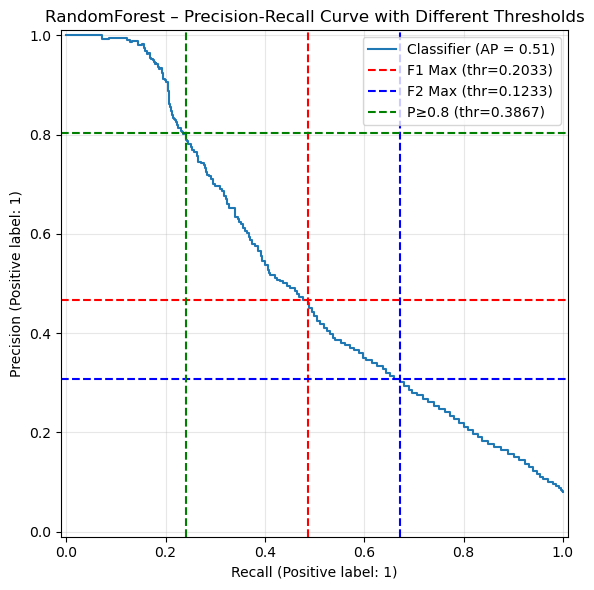

In [84]:
# Find a threshold that balances precision and recall for Random Forest
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# Option 1: Find threshold for specific target recall
target_recall = 0.75  # We want to catch 75% of late deliveries
idx = np.where((recalls >= target_recall) & (recalls < 1.0))[0]
if idx.size:
    best_recall_thr = thresholds[idx[0]]
    print(f"Threshold for ≥{target_recall*100:.0f}% recall: {best_recall_thr:.4f}")
    print(f"  resulting precision     : {precisions[idx[0]]:.4f}")
else:
    print(f"Model cannot reach {target_recall*100:.0f}% recall")

# Option 2: Find threshold for good precision (e.g., 80%)
target_precision = 0.80
idx_prec = np.where(precisions >= target_precision)[0]
if idx_prec.size:
    # Get the highest recall that maintains target precision
    max_recall_idx = idx_prec[np.argmax(recalls[idx_prec])]
    best_prec_thr = thresholds[max_recall_idx]
    print(f"\nThreshold for ≥{target_precision*100:.0f}% precision: {best_prec_thr:.4f}")
    print(f"  resulting recall        : {recalls[max_recall_idx]:.4f}")
else:
    print(f"\nModel cannot reach {target_precision*100:.0f}% precision")

# Option 3: F1 score optimization (balance between precision and recall)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
best_f1_idx = np.argmax(f1_scores)
best_f1_thr = thresholds[best_f1_idx]
print(f"\nThreshold for maximum F1 score: {best_f1_thr:.4f}")
print(f"  resulting precision     : {precisions[best_f1_idx]:.4f}")
print(f"  resulting recall        : {recalls[best_f1_idx]:.4f}")
print(f"  resulting F1 score      : {f1_scores[best_f1_idx]:.4f}")

# Option 4: F-beta optimization that prioritizes recall
beta = 2  # Beta > 1 favors recall over precision (beta=2 weights recall twice as much as precision)
fbeta_scores = (1 + beta**2) * (precisions * recalls) / ((beta**2 * precisions) + recalls + 1e-10)
best_fbeta_idx = np.argmax(fbeta_scores)
best_fbeta_thr = thresholds[best_fbeta_idx]
print(f"\nThreshold for maximum F{beta} score: {best_fbeta_thr:.4f}")
print(f"  resulting precision     : {precisions[best_fbeta_idx]:.4f}")
print(f"  resulting recall        : {recalls[best_fbeta_idx]:.4f}")
print(f"  resulting F{beta} score      : {fbeta_scores[best_fbeta_idx]:.4f}")

# Select F-beta threshold as our chosen threshold
chosen_threshold = best_fbeta_thr

# Build predictions using the chosen threshold
y_pred_balanced = (y_prob >= chosen_threshold).astype(int)

print("\nClassification report at F-beta optimized threshold:")
print(classification_report(y_test, y_pred_balanced, digits=3))

# Display a confusion matrix
cm = confusion_matrix(y_test, y_pred_balanced)
display(pd.DataFrame(
    cm,
    index=["Actual On-time","Actual Late"],
    columns=["Pred On-time","Pred Late"]
))

# Create precision-recall curve visualization
fig, ax = plt.figure(figsize=(10, 6)), plt.gca()
PrecisionRecallDisplay.from_predictions(y_test, y_prob, ax=ax)

# Add vertical and horizontal lines for F1 threshold
plt.axvline(x=recalls[best_f1_idx], color='r', linestyle='--', label=f'F1 Max (thr={best_f1_thr:.4f})')
plt.axhline(y=precisions[best_f1_idx], color='r', linestyle='--')

# Add vertical and horizontal lines for F-beta threshold
plt.axvline(x=recalls[best_fbeta_idx], color='b', linestyle='--', label=f'F{beta} Max (thr={best_fbeta_thr:.4f})')
plt.axhline(y=precisions[best_fbeta_idx], color='b', linestyle='--')

# Add vertical and horizontal lines for 80% precision threshold
plt.axvline(x=recalls[max_recall_idx], color='g', linestyle='--', label=f'P≥{target_precision} (thr={best_prec_thr:.4f})')
plt.axhline(y=precisions[max_recall_idx], color='g', linestyle='--')

# Enhance the plot
plt.title("RandomForest – Precision-Recall Curve with Different Thresholds")
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [85]:
# Get the feature importances from the Random Forest model
imp = rf_pipe.named_steps['model'].feature_importances_

# Convert to DataFrame and map to feature names
# Get feature names from the preprocessor
preprocessor = rf_pipe.named_steps['preprocess']
feature_names = []

# Extract feature names from each transformer
for name, trans, cols in preprocessor.transformers_:
	if name == 'num':
		feature_names.extend(cols)
	elif name == 'cat':
		# For OHE features, get the full set of output feature names
		feature_names.extend(trans.get_feature_names_out(cols))
	elif name == 'bin':
		feature_names.extend(cols)

# Create a DataFrame with feature names and importance
importance_df = pd.DataFrame({
	'Feature': feature_names,
	'Importance': imp
})

# Sort by importance (descending)
importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)

# Display top 20 features
display(importance_df.head(20))

# Display bottom 20 features (least important)
display(importance_df.tail(20))

,Feature,Importance
0,approve_to_estimated_days,0.070239
1,distance_km,0.052592
2,purchase_to_approve_hrs,0.045692
3,freight_value,0.043167
4,seller_30d_dispatch_late_rate_smoothed,0.042065
5,seller_90d_dispatch_late_rate_smoothed,0.041967
6,sum_freight_value,0.041313
7,total_payment_value,0.039016
8,freight_ratio,0.038990
9,seller_dispatch_hub,0.038230


,Feature,Importance
164,customer_state_AP,4.538149e-05
165,customer_state_RR,4.198084e-05
166,product_category_name_english_party_supplies,4.008279e-05
167,product_category_name_english_music,3.518433e-05
168,product_category_name_english_fashion_sport,3.386391e-05
169,seller_state_PA,3.338202e-05
170,seller_state_MS,3.281157e-05
171,product_category_name_english_books_imported,3.249894e-05
172,product_category_name_english_flowers,3.051624e-05
173,seller_state_RN,2.069468e-05


## Tuning RF + CatBoost

In [28]:
# ──────────────────────────────────────────────────────────────────────────────

import joblib, numpy as np, pandas as pd
from category_encoders.target_encoder import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay
import matplotlib.pyplot as plt
from time import time

target_enc = TargetEncoder(cols=cat_cols, smoothing=0.3)      # smoothing prevents overfit
pre_rf = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", target_enc, cat_cols),
    ("bin", "passthrough", bin_cols)
])

# RF PIPE & TUNER
print("=== Starting RandomForest Tuning ===")
start_time = time()

rf = RandomForestClassifier(
        n_estimators=400,
        class_weight="balanced",
        n_jobs=-1,
        random_state=RANDOM_STATE
)
rf_pipe = Pipeline([("pre", pre_rf), ("model", rf)])

rf_param_grid = {
    "model__n_estimators":  [400, 600, 800, 1000],
    "model__max_depth":     [None, 10, 20, 40],
    "model__min_samples_leaf":[1, 3, 10],
    "model__max_features":  ["sqrt", "log2", 0.3, 0.5]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)
rf_search = RandomizedSearchCV(
    rf_pipe,
    rf_param_grid,
    n_iter=3,
    scoring="average_precision",
    n_jobs=-1,
    cv=cv,
    random_state=RANDOM_STATE,
    verbose=2  # Increased verbosity to see more progress details
).fit(X_train, y_train)

rf_time = time() - start_time
print(f"RandomForest tuning completed in {rf_time:.2f} seconds ({rf_time/60:.2f} minutes)")
print("Best RF PR-AUC:", rf_search.best_score_)
print("Best params  :", rf_search.best_params_)

# CATBOOST PIPE & TUNER  (no OHE, native cat handling)
print("\n=== Starting CatBoost Tuning ===")
start_time = time()

X_train_cat = X_train.copy()
X_test_cat  = X_test.copy()
for c in cat_cols:                 # convert on copies so df stays unchanged
    X_train_cat[c] = X_train_cat[c].astype(str)
    X_test_cat[c]  = X_test_cat[c].astype(str)

cat = CatBoostClassifier(
        loss_function="Logloss",
        eval_metric="AUC",
        random_state=RANDOM_STATE,
        verbose=0,
        cat_features=cat_cols,
        allow_writing_files=False
)
cat_param_grid = {
    "iterations"     : [ 600, 1000, 1500, 2000],
    "depth"          : [4, 6, 8],
    "learning_rate"  : [0.05, 0.1, 0.2],
    "l2_leaf_reg"    : [1, 3, 5, 7]
}

cat_search = RandomizedSearchCV(
    cat,
    cat_param_grid,
    n_iter=3,
    scoring="average_precision",
    n_jobs=-1,
    cv=cv,
    random_state=RANDOM_STATE,
    verbose=2  # Increased verbosity to see more progress details
).fit(X_train_cat, y_train)

cat_time = time() - start_time
print(f"CatBoost tuning completed in {cat_time:.2f} seconds ({cat_time/60:.2f} minutes)")
print("Best Cat PR-AUC:", cat_search.best_score_)
print("Best params    :", cat_search.best_params_)

# ──────────────────────────────────────────────────────────────────────────────
# CHOOSE THE WINNER (higher mean CV PR-AUC)
best_model_name, best_est = (
    ("CatBoost", cat_search.best_estimator_)
    if cat_search.best_score_ > rf_search.best_score_
    else ("RandomForest", rf_search.best_estimator_)
)
print(f"\nSelected model → {best_model_name}")
print(f"Best PR-AUC score: {max(cat_search.best_score_, rf_search.best_score_):.4f}")

# ──────────────────────────────────────────────────────────────────────────────
# FIT ON FULL TRAINING SET & EVALUATE
print(f"\nFitting {best_model_name} on full training set...")
start_time = time()

if best_model_name == "CatBoost":
    best_est.fit(X_train_cat, y_train)
    y_prob = best_est.predict_proba(X_test_cat)[:,1]
else:
    best_est.fit(X_train, y_train)          # rf_pipe includes its preprocessor
    y_prob = best_est.predict_proba(X_test)[:,1]

fit_time = time() - start_time
print(f"Final model fitting completed in {fit_time:.2f} seconds ({fit_time/60:.2f} minutes)")

=== Starting RandomForest Tuning ===
Fitting 3 folds for each of 3 candidates, totalling 9 fits
RandomForest tuning completed in 728.25 seconds (12.14 minutes)
Best RF PR-AUC: 0.44655451890954345
Best params  : {'model__n_estimators': 800, 'model__min_samples_leaf': 3, 'model__max_features': 'sqrt', 'model__max_depth': None}

=== Starting CatBoost Tuning ===
Fitting 3 folds for each of 3 candidates, totalling 9 fits
CatBoost tuning completed in 1572.31 seconds (26.21 minutes)
Best Cat PR-AUC: 0.4271333402997673
Best params    : {'learning_rate': 0.2, 'l2_leaf_reg': 3, 'iterations': 2000, 'depth': 8}

Selected model → RandomForest
Best PR-AUC score: 0.4466

Fitting RandomForest on full training set...
Final model fitting completed in 70.16 seconds (1.17 minutes)



Threshold @ recall ≥80%: 0.000
   precision: 0.079   recall: 1.000

Classification report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000     20245
           1      0.079     1.000     0.147      1742

    accuracy                          0.079     21987
   macro avg      0.040     0.500     0.073     21987
weighted avg      0.006     0.079     0.012     21987


Confusion matrix:
[[    0 20245]
 [    0  1742]]


d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


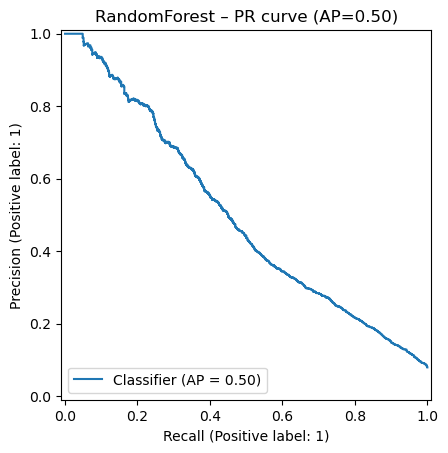

In [29]:
# threshold for recall target
recall_target = 0.80
prec, rec, thr = precision_recall_curve(y_test, y_prob)
idx = np.where(rec >= recall_target)[0]
if idx.size:
    thr_opt = thr[idx[0]]
else:                            # cannot reach target → take max recall
    thr_opt = 0.0
    idx = [rec.argmax()]

print(f"\nThreshold @ recall ≥{recall_target:.0%}: {thr_opt:.3f}")
print(f"   precision: {prec[idx[0]]:.3f}   recall: {rec[idx[0]]:.3f}")

y_pred = (y_prob >= thr_opt).astype(int)

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=3))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))

PrecisionRecallDisplay.from_predictions(y_test, y_prob)
plt.title(f"{best_model_name} – PR curve (AP={average_precision_score(y_test, y_prob):.2f})")
plt.show()


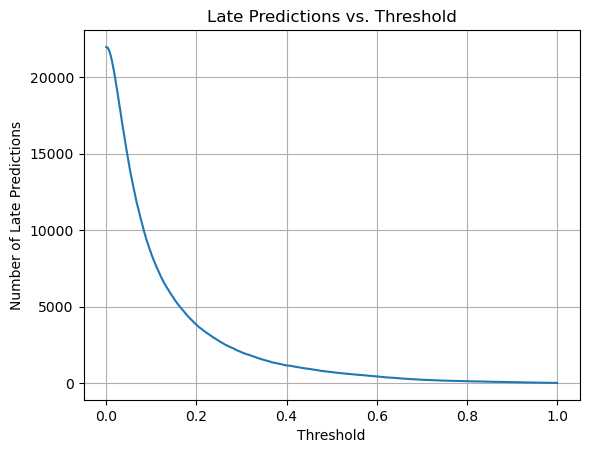

In [30]:
thresholds = np.append(thr, 1.0)  # precision_recall_curve leaves out 1.0
pred_pos = [(y_prob >= t).sum() for t in thresholds]
plt.figure()
plt.plot(thresholds, pred_pos, label='Number predicted late')
plt.xlabel('Threshold')
plt.ylabel('Number of Late Predictions')
plt.title('Late Predictions vs. Threshold')
plt.grid(True)
plt.show()

In [35]:
from sklearn.pipeline import Pipeline
import pickle
import pickle

# ──────────────────────────────────────────────────────────────────────────────
# SAVE ARTEFACTS - Enhanced for Streamlit compatibility

# Save the model with proper pickle protocol (default is safer)
with open(f"{best_model_name.lower()}_model.pkl", 'wb') as f:
    pickle.dump(best_est, f)

# Also save model metadata in a separate file for easy loading in Streamlit
model_metadata = {
    'model_name': best_model_name,
    'pr_auc_score': max(cat_search.best_score_, rf_search.best_score_),
    'feature_columns': {
        'numerical': num_cols,
        'categorical': cat_cols,
        'binary': bin_cols
    },
    'best_params': cat_search.best_params_ if best_model_name == "CatBoost" else rf_search.best_params_,
    'needs_categorical_conversion': best_model_name == "CatBoost"  # Flag for CatBoost's special handling
}

with open(f"{best_model_name.lower()}_metadata.pkl", 'wb') as f:
    pickle.dump(model_metadata, f)

print(f"\nSaved {best_model_name} to {best_model_name.lower()}_model.pkl")
print(f"Saved metadata to {best_model_name.lower()}_metadata.pkl")
print("\nFor Streamlit, load the model using:")
print(f"""
# Sample loading code for Streamlit

# Load model
with open('{best_model_name.lower()}_model.pkl', 'rb') as f:
    model = pickle.load(f)
    
# Load metadata (optional but useful)
with open('{best_model_name.lower()}_metadata.pkl', 'rb') as f:
    metadata = pickle.load(f)
""")



Saved RandomForest to randomforest_model.pkl
Saved metadata to randomforest_metadata.pkl

For Streamlit, load the model using:

# Sample loading code for Streamlit

# Load model
with open('randomforest_model.pkl', 'rb') as f:
    model = pickle.load(f)
    
# Load metadata (optional but useful)
with open('randomforest_metadata.pkl', 'rb') as f:
    metadata = pickle.load(f)



## Residual Analysis

In [32]:
def error_breakdown(df_test, y_true, y_pred, col):
    tmp = df_test.copy()
    tmp['true'] = y_true.values
    tmp['pred'] = y_pred
    return (
        tmp.groupby(col)
           .apply(lambda g: pd.Series({
               "count": len(g),
               "late_rate": g['true'].mean(),
               "precision": (g['pred'] & g['true']).sum() / max(g['pred'].sum(),1),
               "recall":   (g['pred'] & g['true']).sum() / max(g['true'].sum(),1)
           }))
           .sort_values("count", ascending=False)
    )

In [33]:
for col in ["seller_state", "product_category_name_english", "distance_bin"]:
    display(error_breakdown(X_test, y_test, y_pred, col).head(10))

C:\Users\User\AppData\Local\Temp\ipykernel_6864\480247179.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


,count,late_rate,precision,recall
seller_state,,,,
SP,15693.0,0.084433,0.084433,1.0
PR,1790.0,0.063687,0.063687,1.0
MG,1647.0,0.061931,0.061931,1.0
RJ,921.0,0.089034,0.089034,1.0
SC,805.0,0.059627,0.059627,1.0
RS,422.0,0.047393,0.047393,1.0
DF,185.0,0.081081,0.081081,1.0
BA,122.0,0.032787,0.032787,1.0
GO,93.0,0.010753,0.010753,1.0


C:\Users\User\AppData\Local\Temp\ipykernel_6864\480247179.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


,count,late_rate,precision,recall
product_category_name_english,,,,
bed_bath_table,2276.0,0.089192,0.089192,1.0
health_beauty,1808.0,0.086283,0.086283,1.0
sports_leisure,1628.0,0.079238,0.079238,1.0
furniture_decor,1572.0,0.090967,0.090967,1.0
computers_accessories,1513.0,0.081295,0.081295,1.0
housewares,1329.0,0.070730,0.070730,1.0
watches_gifts,1220.0,0.081148,0.081148,1.0
telephony,936.0,0.091880,0.091880,1.0
garden_tools,887.0,0.085682,0.085682,1.0


KeyError: 'distance_bin'

## Explainable AI

In [ ]:
import shap, matplotlib.pyplot as plt
if best_model_name == "CatBoost":
    explainer = shap.TreeExplainer(best_est)
    shap_values = explainer.shap_values(X_test_cat.iloc[:2000])
else:
    explainer = shap.TreeExplainer(best_est.named_steps['model'])
    Xt = best_est.named_steps['pre'].transform(X_test)  # encoded
    shap_values = explainer.shap_values(Xt[:2000])

shap.summary_plot(shap_values, features=X_test.iloc[:2000], max_display=20)

## Business Impact

In [ ]:
avg_order_value   = 163  # R$   (placeholder)
voucher_pct       = 0.05 # 5% voucher
late_orders_caught = (y_pred & y_test).sum()
false_positives    = (y_pred & (~y_test.astype(bool))).sum()

revenue_saved    = late_orders_caught * avg_order_value  # simple proxy
voucher_cost     = false_positives * avg_order_value * voucher_pct

print(f"Late deliveries prevented: {late_orders_caught}")
print(f"Voucher cost (false positives): R$ {voucher_cost:,.0f}")
print(f"Net impact proxy: R$ {revenue_saved - voucher_cost:,.0f}")